# select features using random forest
- select features
- build top_features for ANN modeling

In [1]:
import json
import os
from copy import deepcopy
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%load_ext autoreload
%autoreload 2

# classifier

In [4]:
from classifier import Classifier
cl = Classifier()

## 1. physcial chemical properties

In [8]:
infile = '/home/yuan/results/epitope/epi_physical_chemical.txt'
df1 = cl.get_df(infile)
df1

input data: (2490831, 17)


,seq,label,mean_hydro_ph7,mean_hydro,mean_polar,mean_polar_stab,mean_VDWV,median_hydro_ph7,median_hydro,median_polar,median_polar_stab,median_VDWV,variance_hydro_ph7,variance_hydro,variance_polar,variance_polar_stab,variance_VDWV
330524,GAKSFYKNLIWLVKK,1,36.333333,1.236000,8.053333,0.187533,4.004667,41.0,1.150,8.10,0.1860,4.00,2838.488889,0.583171,7.215822,0.010120,4.103545
591238,SPEERARY,1,-4.625000,0.828750,9.637500,0.177625,3.951250,-14.0,0.600,9.85,0.1510,3.78,1241.734375,0.422336,4.089844,0.009310,3.956361
2340182,ERSVPTFKDGT,0,2.545455,0.744545,9.236364,0.145909,3.260909,-5.0,0.470,9.00,0.1310,2.78,2081.338843,0.514079,5.384132,0.007302,2.958936
846999,AAGIRASANLAA,1,32.916667,0.682500,8.250000,0.094583,2.056667,41.0,0.610,8.10,0.0460,1.00,1441.576389,0.356935,3.200833,0.006751,3.006739
1736014,GAFTCIAANAAGEATAMVEVSIVQLPHLSNS,1,31.451613,0.774516,8.080645,0.117355,2.565806,41.0,0.610,8.10,0.1310,2.72,1964.828304,0.485096,4.817045,0.004943,2.130192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999615,QRDSQDASAEQS,0,-9.833333,0.280000,10.341667,0.122500,2.843333,-10.0,0.255,10.50,0.1050,2.78,815.305556,0.067917,2.669097,0.005202,2.232922
1712606,HTSESDGRFR,1,-0.300000,0.498000,9.790000,0.159000,3.517000,-5.0,0.465,9.80,0.1295,3.28,1466.010000,0.313736,4.178900,0.010673,4.176541
144710,RKMLMALLSDNAYLKW,1,39.375000,1.106250,7.856250,0.188437,4.025625,52.0,1.165,7.15,0.1860,4.00,2850.609375,0.443223,7.883711,0.008854,3.448762
662291,RTLSDISNASSSFGW,1,21.666667,0.701333,8.500000,0.137667,3.028667,-5.0,0.070,9.20,0.1050,2.60,2503.822222,0.797425,5.405333,0.012197,4.596932


In [9]:
# prepare X and y
X1_train, X1_test, y1_train, y1_test = cl.xy(df1)

X and y: (2490831, 15) float16 (2490831,) float16
labels: Counter({1.0: 1798795, 0.0: 692036})
train data: (1743581, 15) (1743581,)
test_data:  (747250, 15) (747250,)


In [10]:
#split data and train model of random forest
model1 = cl.train_rf(X1_train, y1_train)

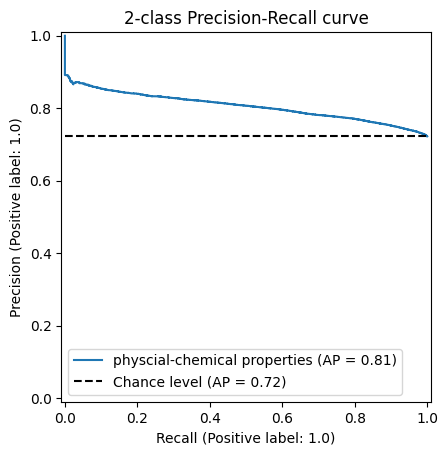

In [11]:
from sklearn.metrics import PrecisionRecallDisplay

# average precision
display = PrecisionRecallDisplay.from_estimator(
    model1, X1_test, y1_test, 
    name='physcial-chemical properties',
    plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

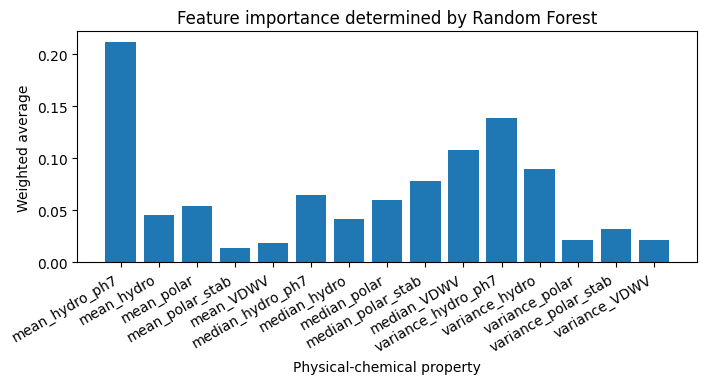

In [12]:
# feature importance
imp = pd.Series(model1.feature_importances_, index = list(df1)[2:])

plt.figure(figsize=(8,3))
plt.bar(imp.index, imp)
plt.title('Feature importance determined by Random Forest')
plt.xlabel('Physical-chemical property')
plt.ylabel('Weighted average')
# ha: horizontal alignment
plt.xticks(rotation=30, ha='right')
plt.show()

## 2. frequencies of amio acids

In [13]:
infile = '/home/yuan/results/epitope/epi_frequency_aa.txt'
df2 = cl.get_df(infile)

input data: (2490831, 422)


In [14]:
# prepare X and y
X2_train, X2_test, y2_train, y2_test = cl.xy(df2)

X and y: (2490831, 420) float16 (2490831,) float16
labels: Counter({1.0: 1798795, 0.0: 692036})
train data: (1743581, 420) (1743581,)
test_data:  (747250, 420) (747250,)


In [15]:
#split data and train model
model2 = cl.train_rf(X2_train, y2_train)

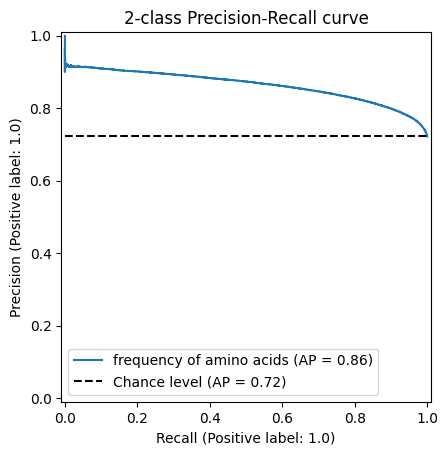

In [16]:
from sklearn.metrics import PrecisionRecallDisplay

# average precision
display = PrecisionRecallDisplay.from_estimator(
    model2, X2_test, y2_test, 
    name='frequency of amino acids',
    plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

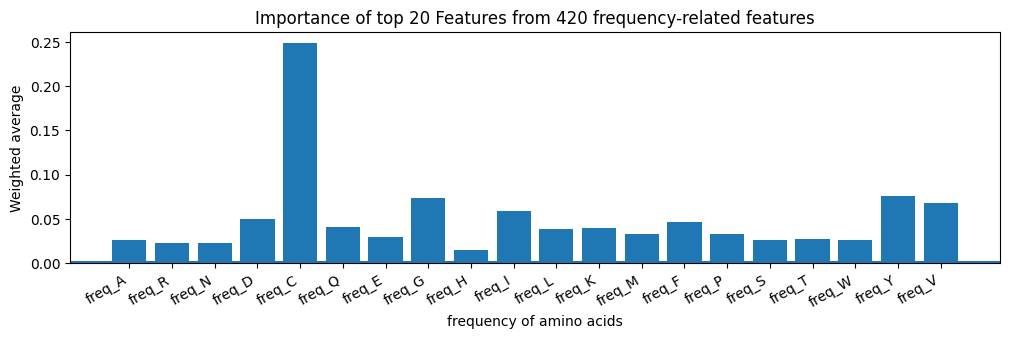

In [17]:
# feature importance
imp = pd.Series(model2.feature_importances_, index = list(df2)[2:])
threshold = 0.001
top_freq = imp[imp > threshold]

plt.figure(figsize=(12,3))
plt.bar(top_freq.index, top_freq)
plt.title(f'Importance of top {len(top_freq)} Features from {len(imp)} frequency-related features')
plt.xlabel('frequency of amino acids')
plt.ylabel('Weighted average')
# ha: horizontal alignment
plt.xticks(rotation=30, ha='right')
plt.axhline(y=threshold)
plt.show()

In [18]:
top_freq.index

Index(['freq_A', 'freq_R', 'freq_N', 'freq_D', 'freq_C', 'freq_Q', 'freq_E',
       'freq_G', 'freq_H', 'freq_I', 'freq_L', 'freq_K', 'freq_M', 'freq_F',
       'freq_P', 'freq_S', 'freq_T', 'freq_W', 'freq_Y', 'freq_V'],
      dtype='object')

## 3. if existing

In [19]:
infile = '/home/yuan/results/epitope/epi_aa_existing.txt'
df3 = cl.get_df(infile)

input data: (2490831, 422)


In [20]:
# prepare X and y
X3_train, X3_test, y3_train, y3_test = cl.xy(df3)

X and y: (2490831, 420) float16 (2490831,) float16
labels: Counter({1.0: 1798795, 0.0: 692036})
train data: (1743581, 420) (1743581,)
test_data:  (747250, 420) (747250,)


In [21]:
#split data and train model
model3 = cl.train_rf(X3_train, y3_train)

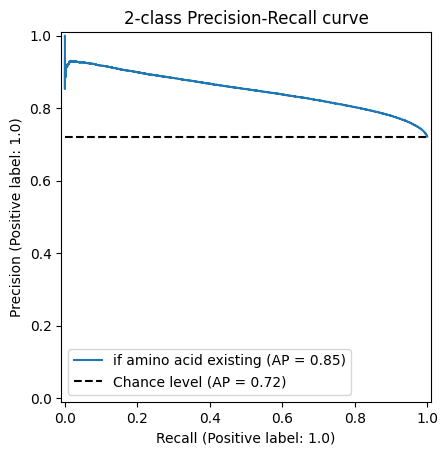

In [22]:
from sklearn.metrics import PrecisionRecallDisplay

# average precision
display = PrecisionRecallDisplay.from_estimator(
    model3, X3_test, y3_test, 
    name='if amino acid existing',
    plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

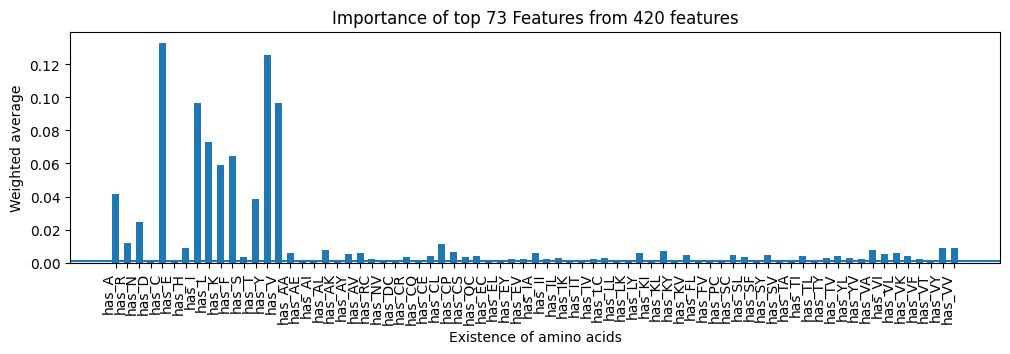

In [23]:
# feature importance
imp = pd.Series(model3.feature_importances_, index = list(df3)[2:])
threshold = 0.001
top_exist = imp[imp > threshold]

plt.figure(figsize=(12,3))
plt.bar(top_exist.index, top_exist, align='center', width=.6)
plt.title(f'Importance of top {len(top_exist)} Features from {len(imp)} features')
plt.xlabel('Existence of amino acids')
plt.ylabel('Weighted average')
# ha: horizontal alignment
plt.xticks(rotation=90, ha='right')
plt.axhline(y=threshold)
plt.show()

In [24]:
top_exist.index

Index(['has_A', 'has_R', 'has_N', 'has_D', 'has_C', 'has_E', 'has_H', 'has_I',
       'has_L', 'has_K', 'has_F', 'has_S', 'has_T', 'has_Y', 'has_V', 'has_AA',
       'has_AE', 'has_AI', 'has_AL', 'has_AK', 'has_AY', 'has_AV', 'has_RC',
       'has_NV', 'has_DC', 'has_CR', 'has_CQ', 'has_CE', 'has_CL', 'has_CP',
       'has_CS', 'has_QC', 'has_EC', 'has_EL', 'has_EY', 'has_EV', 'has_IA',
       'has_II', 'has_IL', 'has_IK', 'has_IT', 'has_IV', 'has_LC', 'has_LL',
       'has_LK', 'has_LY', 'has_KI', 'has_KL', 'has_KY', 'has_KV', 'has_FL',
       'has_FV', 'has_PC', 'has_SC', 'has_SL', 'has_SF', 'has_SY', 'has_SV',
       'has_TA', 'has_TI', 'has_TL', 'has_TY', 'has_TV', 'has_YL', 'has_YV',
       'has_VA', 'has_VI', 'has_VL', 'has_VK', 'has_VF', 'has_VT', 'has_VY',
       'has_VV'],
      dtype='object')

## 4. combine all features

In [25]:
df =pd.concat([df1, df2[top_freq.index], df3[top_exist.index]], axis=1)
print(df.shape)
print(df.head())

(2490831, 110)
                                     seq  label  mean_hydro_ph7  mean_hydro  \
330524                   GAKSFYKNLIWLVKK      1       36.333333    1.236000   
591238                          SPEERARY      1       -4.625000    0.828750   
2340182                      ERSVPTFKDGT      0        2.545455    0.744545   
846999                      AAGIRASANLAA      1       32.916667    0.682500   
1736014  GAFTCIAANAAGEATAMVEVSIVQLPHLSNS      1       31.451613    0.774516   

         mean_polar  mean_polar_stab  mean_VDWV  median_hydro_ph7  \
330524     8.053333         0.187533   4.004667              41.0   
591238     9.637500         0.177625   3.951250             -14.0   
2340182    9.236364         0.145909   3.260909              -5.0   
846999     8.250000         0.094583   2.056667              41.0   
1736014    8.080645         0.117355   2.565806              41.0   

         median_hydro  median_polar  ...  has_YL  has_YV  has_VA  has_VI  \
330524           1.

In [26]:
# prepare X and y
X_train, X_test, y_train, y_test = cl.xy(df)

X and y: (2490831, 108) float16 (2490831,) float16
labels: Counter({1.0: 1798795, 0.0: 692036})
train data: (1743581, 108) (1743581,)
test_data:  (747250, 108) (747250,)


In [27]:
#split data and train model
model = cl.train_rf(X_train, y_train)

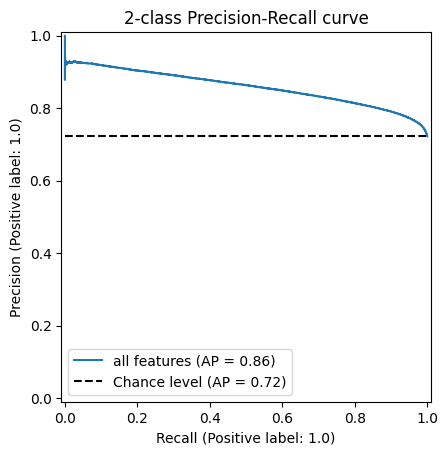

In [28]:
from sklearn.metrics import PrecisionRecallDisplay

# average precision
display = PrecisionRecallDisplay.from_estimator(
    model, X_test, y_test, 
    name='all features',
    plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

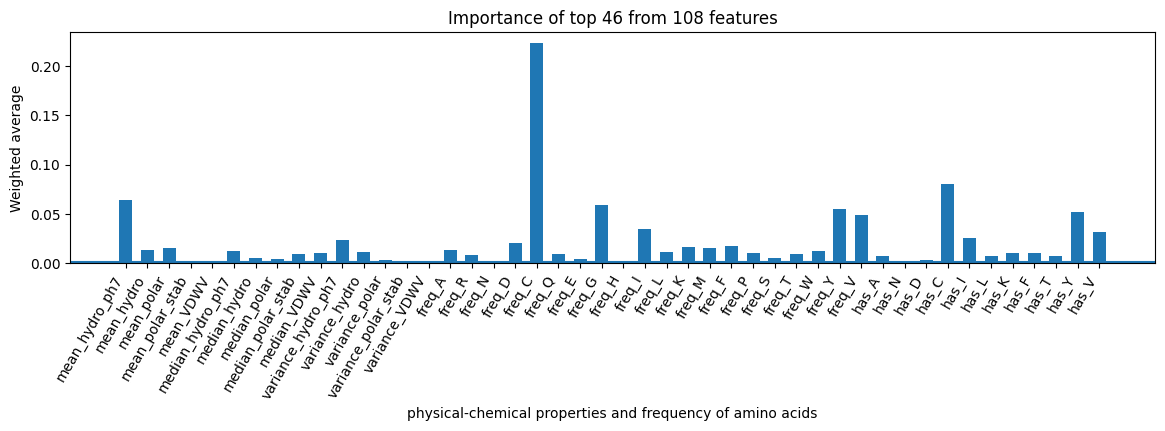

In [29]:
# feature importance
imp = pd.Series(model.feature_importances_, index = list(df)[2:])
threshold = 0.001
top_imp = imp[imp > threshold]

plt.figure(figsize=(14,3))
plt.bar(top_imp.index, top_imp, width=.6)
plt.title(f'Importance of top {len(top_imp)} from {len(imp)} features')
plt.xlabel('physical-chemical properties and frequency of amino acids')
plt.ylabel('Weighted average')
# ha: horizontal alignment
plt.xticks(rotation=60, ha='right')
plt.axhline(y=threshold)
plt.show()

In [30]:
top_imp.index

Index(['mean_hydro_ph7', 'mean_hydro', 'mean_polar', 'mean_polar_stab',
       'mean_VDWV', 'median_hydro_ph7', 'median_hydro', 'median_polar',
       'median_polar_stab', 'median_VDWV', 'variance_hydro_ph7',
       'variance_hydro', 'variance_polar', 'variance_polar_stab',
       'variance_VDWV', 'freq_A', 'freq_R', 'freq_N', 'freq_D', 'freq_C',
       'freq_Q', 'freq_E', 'freq_G', 'freq_H', 'freq_I', 'freq_L', 'freq_K',
       'freq_M', 'freq_F', 'freq_P', 'freq_S', 'freq_T', 'freq_W', 'freq_Y',
       'freq_V', 'has_A', 'has_N', 'has_D', 'has_C', 'has_I', 'has_L', 'has_K',
       'has_F', 'has_T', 'has_Y', 'has_V'],
      dtype='object')

In [31]:
top_df = df[['seq', 'label'] + list(top_imp.index)]
outfile = '/home/yuan/results/epitope/epi_top_features.txt'
top_df.to_csv(outfile, header=True, index=False, sep='\t')

## 5. distribution of top features

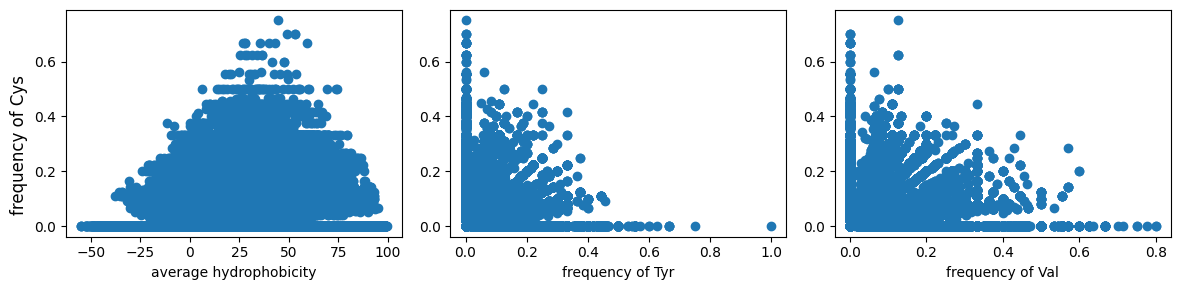

In [32]:
fig, ax = plt.subplots(1, 3, figsize=(12,3), layout='tight')
fig.supylabel('frequency of Cys')

i=0
ax[i].scatter(top_df['mean_hydro_ph7'], top_df['freq_C'])
ax[i].set_xlabel('average hydrophobicity')
i=1
ax[i].scatter(top_df['freq_Y'], top_df['freq_C'])
ax[i].set_xlabel('frequency of Tyr')
i=2
ax[i].scatter(top_df['freq_V'], top_df['freq_C'])
ax[i].set_xlabel('frequency of Val')
plt.show()

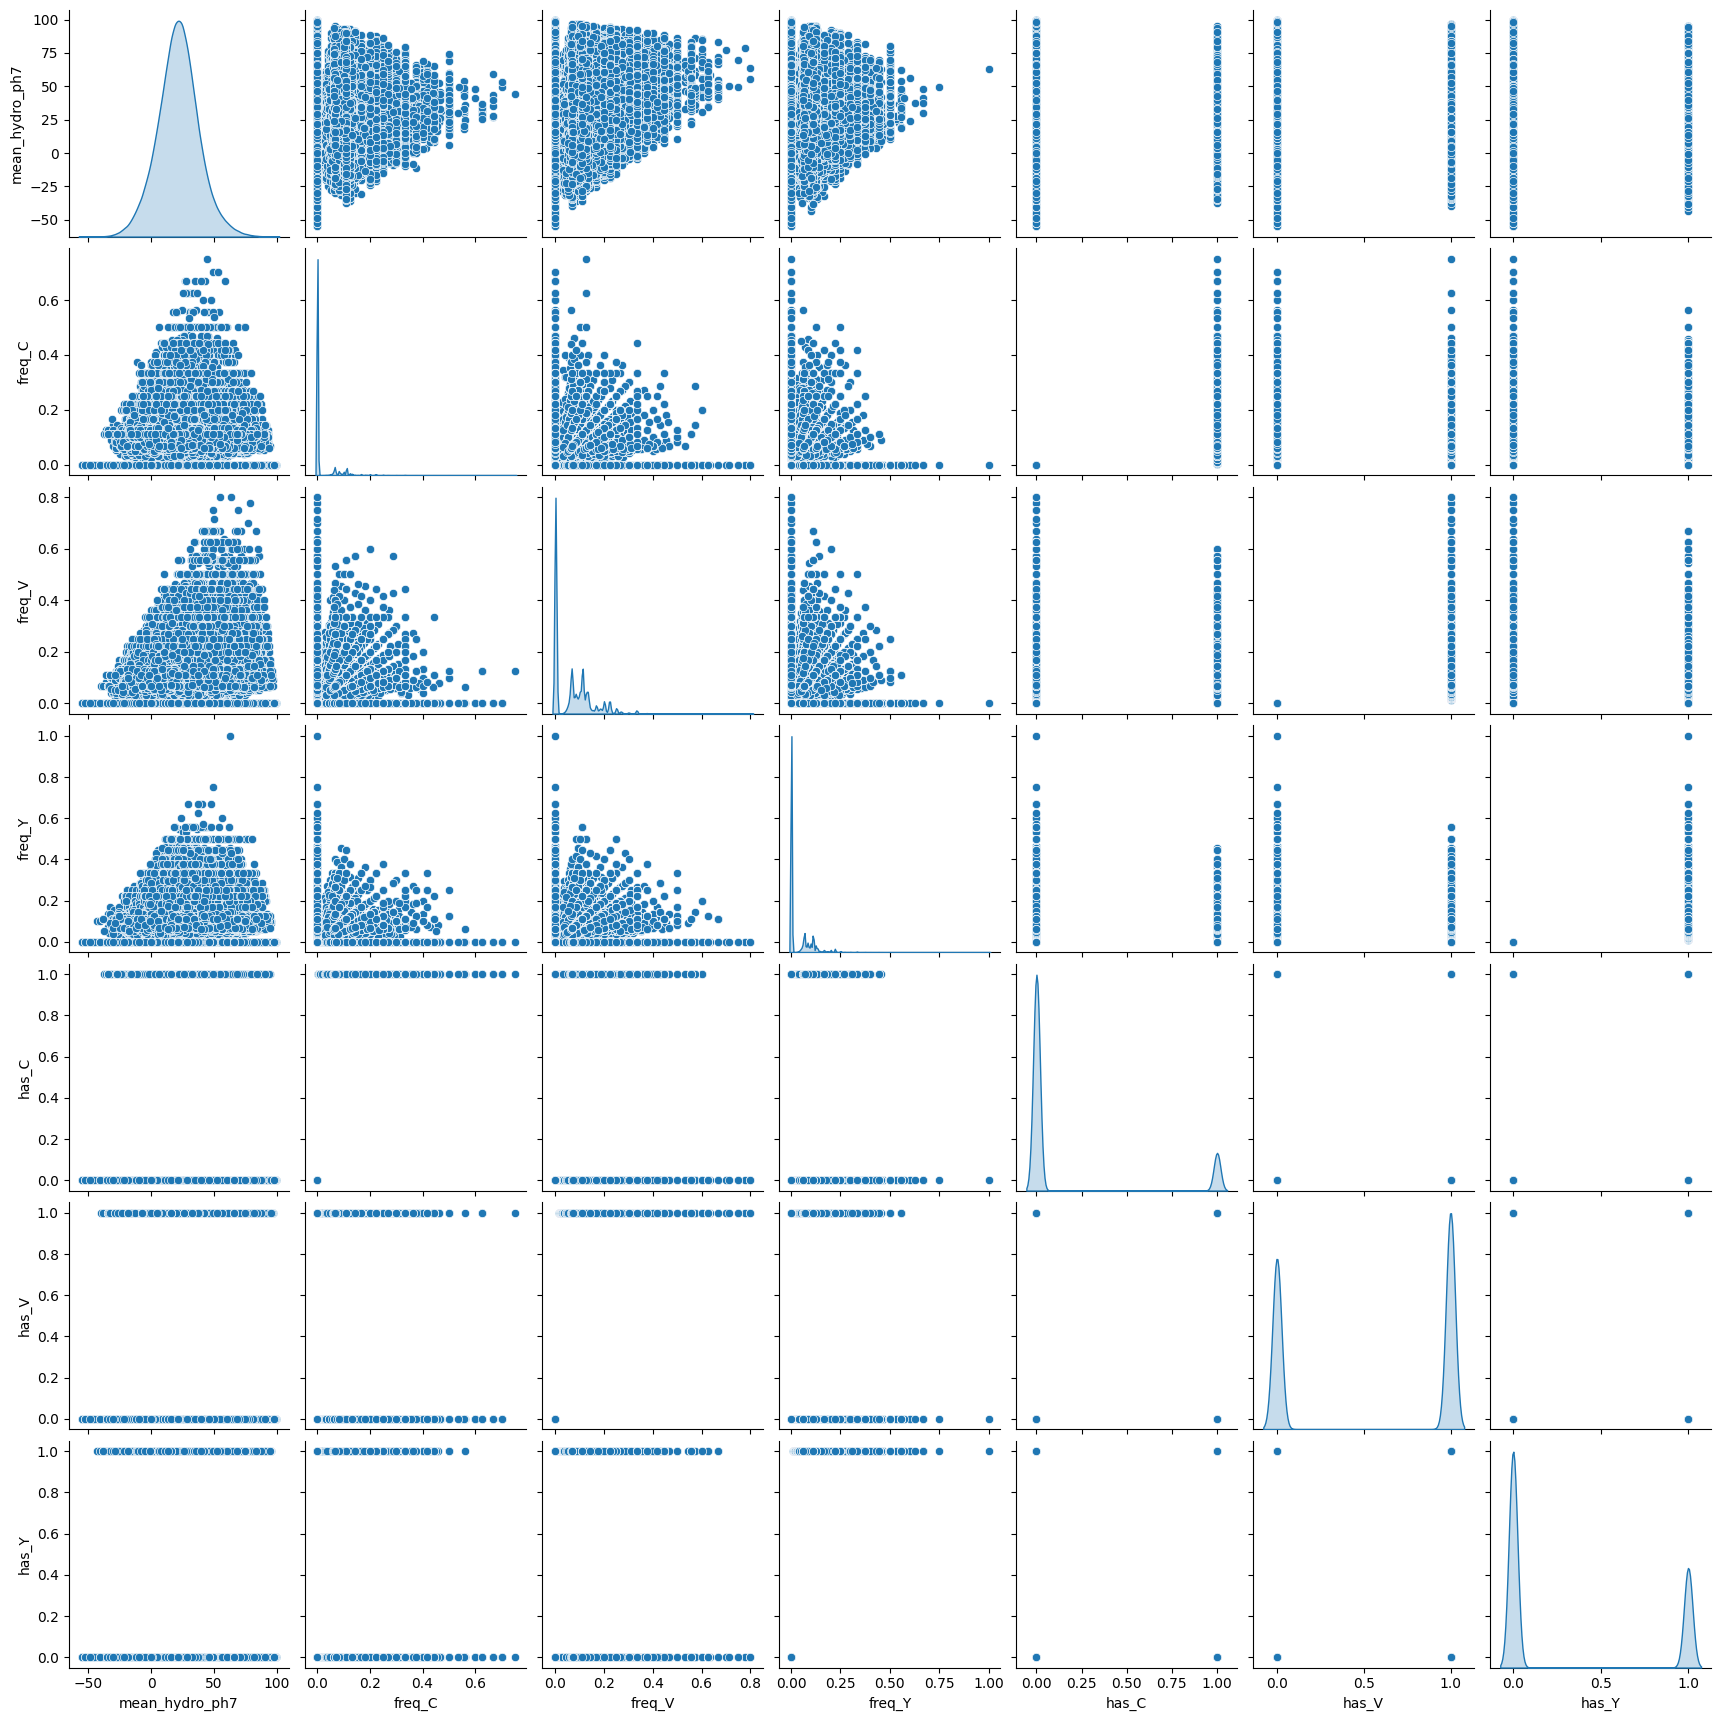

In [34]:
# correlations among features
names = ['mean_hydro_ph7','freq_C', 'freq_V', 'freq_Y','has_C', 'has_V', 'has_Y',]
sns.pairplot(df[names], diag_kind='kde')

## 6. test

In [39]:
X_test.shape

(747250, 108)

In [35]:
pred_test = model.predict(X_test)
pred_test[:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float16)

Text(0.5, 1.0, 'Prediction of non-epitopes 207467')

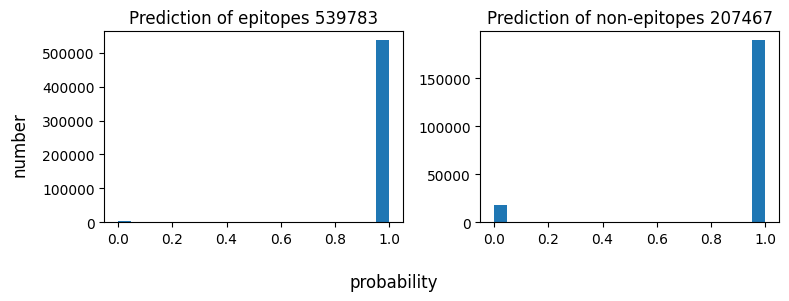

In [36]:
t = pred_test[y_test==1]
f = pred_test[y_test==0]
fig, ax = plt.subplots(1, 2, figsize=(8,3), layout='tight')
fig.supxlabel('probability')
fig.supylabel('number')

ax[0].hist(t, label='True', bins=20)
ax[0].set_title(f'Prediction of epitopes {len(t)}')
ax[1].hist(f, label='False', bins=20)
ax[1].set_title(f'Prediction of non-epitopes {len(f)}')

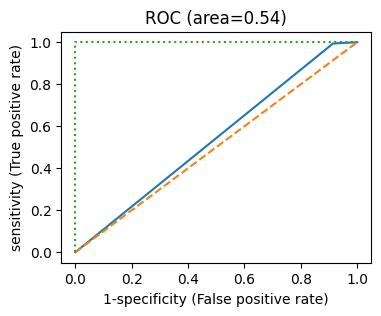

In [38]:
# ROC curve only for binary classfication
from sklearn.metrics import roc_curve, auc
# FPR, false positive rate, 1- specificity, typ I error
# TPR, true positive rate, sensitivity, power
fpr, tpr, thresholds = roc_curve(y_test, pred_test)
roc_auc = auc(fpr, tpr)

fig, ax = plt.subplots(1, figsize=(4,3))
ax.plot(fpr, tpr)
ax.set_xlabel('1-specificity (False positive rate)')
ax.set_ylabel('sensitivity (True positive rate)')
plt.title(f'ROC (area={roc_auc:.2f})')
ax.plot([0,1], [0,1], '--')
ax.plot([0,0,1], [0,1,1], ':')